/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: covariance is not positive-semidefinite.
  # This is added back by InteractiveShellApp.init_path()


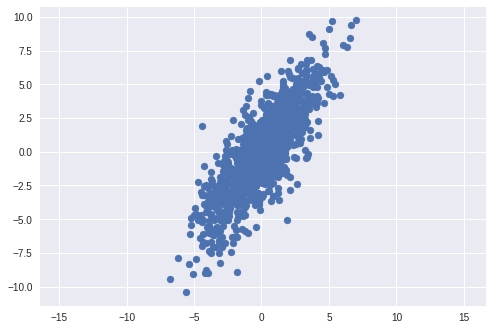

In [128]:

import matplotlib.pyplot as plt
import numpy as np

plt.axis('equal')


mean = [0, 0]
cov = [[3, 7], [7, 10]]  # diagonal covariance

x, y = np.random.multivariate_normal(mean, cov, 1000).T
plt.scatter(x, y)

In [129]:
print(np.cov(x,y))

[[ 4.98122584  5.95931445]
 [ 5.95931445 10.81064315]]


[[4.98122584 0.59593145]
 [0.59593145 0.10810643]]


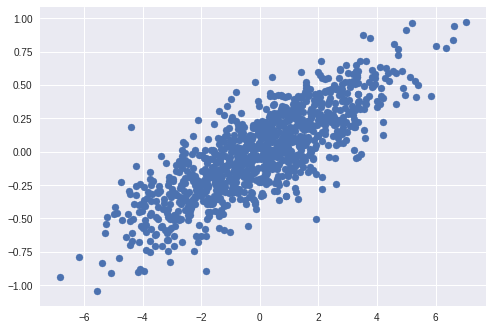

In [130]:
plt.figure()
plt.scatter(x, y/10)
print(np.cov(x,y/10))

In [131]:
transform = np.array([[1,0.2],[0.2,1]])
print(transform)

[[1.  0.2]
 [0.2 1. ]]


In [0]:
def linear_transformation(src, a):
    M, N = src.shape
    points = np.mgrid[0:N, 0:M].reshape((2, M*N))
    new_points = np.linalg.inv(a).dot(points).round().astype(int)
    x, y = new_points.reshape((2, M, N), order='F')
    indices = x + N*y
    return np.take(src, indices, mode='wrap')

def lin_transf(x,y,tmat):
  
  xx = []
  yy = []

  for xi,yi in zip(x,y):
    t = np.matmul(tmat, np.array([xi,yi]))
    #print(t)
    xx.append(t[0])
    yy.append(t[1])
 
  #print(xx,yy)
  plt.scatter(xx,yy)
  print(np.cov(xx,yy))
  return xx,yy,np.cov(xx,yy)


[[ 6.28119516  7.59809449]
 [ 7.59809449 12.0523183 ]]
[[ 4.98122584  5.95931445]
 [ 5.95931445 10.81064315]]
[[ 0.67061928 -0.42277581]
 [-0.42277581  0.34950044]]
cov:
[[ 4.98122584  5.95931445]
 [ 5.95931445 10.81064315]]
inv covariance:
[[ 0.58955912 -0.3249916 ]
 [-0.3249916   0.27165147]]
[[ 1.39064475 -1.13780025]
 [-0.76274758  0.9270965 ]]
[[ 4.76994125 -3.83232024]
 [-3.83232024  3.76168377]]


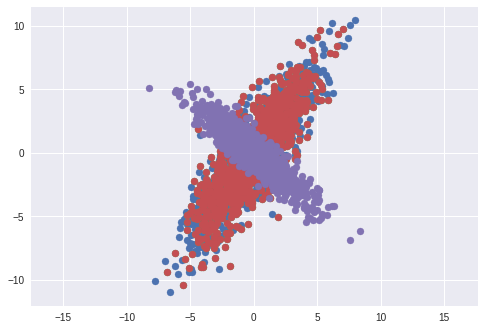

In [154]:
plt.axis('equal')
transform1 = np.array([[1,+0.1],[+0.1,1]])
transform1inv = np.linalg.inv(transform1)
xx,yy,cov1 = lin_transf(x,y,transform1)

transform2 = np.array([[1,-0.2],[-0.2,1]])
_,_,_ = lin_transf(xx,yy,transform1inv)

plt.scatter(x,y)
print(np.linalg.inv(cov1))

print("cov:")
print(np.cov(x,y))
print("inv covariance:")
print(np.linalg.inv(np.cov(x,y)))
#plt.figure()

test = np.linalg.inv(np.array([[2.2, 2.7],[1.81, 3.3]]))
print(test)
transform3 = np.array([[0.39,-0.12],[-0.12,0.27]])
transform3 = np.array([[0.39,-0.12],[-0.12,0.27]])
xxx,yyy,_ = lin_transf(x,y,test)
